# Bifurcation diagram of the full system with respect to $I_{\rm app}$

Model: Hu, version with slow inactivation.

Auto files: [fortran file](utils/models/hu_slow_inact/auto/hu_slow_inact.f90) and [constants](utils/models/hu_slow_inact/auto/c.hu_slow_inact).

Script to compute fixed points and limit cycles used as starting point for auto: [here](prepare_continuation_hu_slow_inact.py).


In [1]:
import matplotlib.pyplot as plt
import utils.auto_helper as auto_helper
import utils.simu_helper as simu_helper
import utils.plot_helper as plot_helper
import prepare_continuation_hu_slow_inact


In [ ]:
prepare_continuation = True
compute_bd = True


### Model

In [3]:
model_name = "hu_slow_inact"
model = simu_helper.import_model(model_name)
auto_dir = auto_helper.compute_auto_dir(model_name)
print(auto_dir)

utils/models/hu_slow_inact/auto


### Parameter values

In [4]:
param_set_ids = ["wt", "altered_inact_half_channels", "altered_inact_all_channels"]
i_app_val = 10

## Prepare continuation

In [5]:
if prepare_continuation:
    prepare_continuation_hu_slow_inact.compute_fp_and_lc(param_set_ids[0], None, compute_lc=False)

    prepare_continuation_hu_slow_inact.compute_fp_and_lc(param_set_ids[1], i_app_val)
    prepare_continuation_hu_slow_inact.compute_fp_and_lc(param_set_ids[2], i_app_val)



## Continuation

### Bifurcation diagram wrt $I_{\rm app}$

In [6]:
if compute_bd:
    for param_set_id in param_set_ids:
        print(param_set_id)
        print(auto_dir)

        # parameter values
        params_simu = getattr(model, f"params_{param_set_id}")
        params = auto_helper.convert_params_dict(params_simu) 


        # 1) fixed points
        inits = auto_helper.load_fixed_point(auto_dir, param_set_id)  # starting point for auto
        print(inits)
        print(param_set_id)
        print(params)
        auto_helper.run(filename="branch_eq", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                        ICP="IAPP", U=inits, PAR=params, UZSTOP={"IAPP": 200})
        auto_helper.run(filename="branch_eq_bwd", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                        ICP="IAPP", U=inits, PAR=params, UZSTOP={"IAPP": -50}, DS="-")
        
        # 2) limit cycles
        if param_set_id in ["wt"]:  # continue limit cycle from Hopf

            auto_helper.run(filename="branch_lc", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                ICP=["IAPP", "PERIOD"], s="branch_eq",
                IRS="HB1", IPLT=-1, IPS=2, STOP="LP5", NTST=1000)
            
        if param_set_id in ["altered_inact_half_channels", "altered_inact_all_channels"]:  # continue limit cycle found by direct simulation
            auto_helper.run(filename="branch_lc", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name,
                ICP=["IAPP", "PERIOD"], dat=f"lc_I_app_{i_app_val}.dat", PAR=params | {"IAPP": i_app_val},
                IPLT=-1, IPS=2, STOP="LP3", NTST=200)



### Bifurcation diagram wrt $I_{\rm app}$ and ${\rm shift}_s$

Shift for all the sodium channels

In [7]:
param_set_id = param_set_ids[0]
if compute_bd:
    # hopf
    auto_helper.run(filename="branch_hopf_all_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_eq", IRS="HB1", ISW=2, UZSTOP={"SHIFTS":0}, STOP="LP1", PAR={"PMUT": 1})
    # snp
    auto_helper.run(filename="branch_snp_1_all_channels_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_lc", IRS="LP1", ISW=2, UZSTOP={"SHIFTS":-15}, STOP="LP1", PAR={"PMUT": 1}, IPS=2)

    auto_helper.run(filename="branch_snp_1_all_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_snp_1_all_channels_dummy", IRS="EP1", ISW=2, UZSTOP={"SHIFTS":0}, STOP="LP2", PAR={"PMUT": 1}, IPS=2)

    auto_helper.run(filename="branch_snp_2_all_channels_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_lc", IRS="LP3", ISW=2, UZSTOP={"SHIFTS":-15}, PAR={"PMUT": 1}, IPS=2)

    auto_helper.run(filename="branch_snp_2_all_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_snp_2_all_channels_dummy", IRS="EP1", ISW=2, UZSTOP={"SHIFTS":0}, STOP="LP2", PAR={"PMUT": 1}, IPS=2)


Shift for only half of the sodium channels

In [8]:
if compute_bd:
    param_set_id = param_set_ids[0]
    # hopf
    auto_helper.run(filename="branch_hopf_half_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_eq", IRS="HB1", ISW=2, UZSTOP={"SHIFTS":0}, STOP="LP1", PAR={"PMUT": 0.5})
    # snp
    auto_helper.run(filename="branch_snp_1_half_channels_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_lc", IRS="LP1", ISW=2, UZSTOP={"SHIFTS":-15}, STOP="LP1", PAR={"PMUT": 0.5}, IPS=2)

    auto_helper.run(filename="branch_snp_1_half_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_snp_1_half_channels_dummy", IRS="EP1", ISW=2, UZSTOP={"SHIFTS":0}, STOP="LP2", PAR={"PMUT": 0.5}, IPS=2)

    auto_helper.run(filename="branch_snp_2_half_channels_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_lc", IRS="LP3", ISW=2, UZSTOP={"SHIFTS":-15}, PAR={"PMUT": 0.5}, IPS=2)

    auto_helper.run(filename="branch_snp_2_half_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_snp_2_half_channels_dummy", IRS="EP1", ISW=2, UZSTOP={"SHIFTS":-1000}, STOP="LP2", PAR={"PMUT": 0.5}, IPS=2)

    auto_helper.run(filename="branch_snp_3_half_channels_dummy", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_lc", IRS="LP4", ISW=2, UZSTOP={"SHIFTS":-15}, PAR={"PMUT": 0.5}, IPS=2)

    auto_helper.run(filename="branch_snp_3_half_channels", auto_dir=auto_dir, output_dir=param_set_id, e=model_name, c=model_name, ICP=["IAPP", "SHIFTS"],
                    s="branch_snp_3_half_channels_dummy", IRS="EP1", ISW=2, UZSTOP={"SHIFTS":-1000}, STOP="LP2", PAR={"PMUT": 0.5}, IPS=2, DS="-")

## Figures

### Bifurcation diagram with respect to the applied current

In [9]:
def plot_bd_wt(ax, variant, runs_to_plot):
    l_eq_stable, l_eq_unstable, l_lc_stable, l_lc_unstable = auto_helper.plot_bd(
        ax, auto_dir, variant, runs_to_plot, 0)
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB2", label="HB",
                                   label_legend="Hopf", **auto_helper.hopf_plot_args)
    
    for fold_idx in [1, 2, 3, 4]:
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC",
                                    label_legend="SNP", **auto_helper.snp_plot_args)
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC", var_idx=-1, **auto_helper.snp_plot_args)
        
    auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[0], label_auto="HB1", label="HB", **auto_helper.hopf_plot_args)
    
    


In [10]:
def plot_bd_isolas(ax, variant, runs_to_plot):
    l_eq_stable, l_eq_unstable, l_lc_stable, l_lc_unstable = auto_helper.plot_bd(
        ax, auto_dir, variant, runs_to_plot, 0)
    
    for fold_idx in [1, 2]:
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC",
                                    label_legend="SNP", **auto_helper.snp_plot_args)
        auto_helper.plot_special_point(ax, auto_dir, variant, runs_to_plot[1], label_auto=f"LP{fold_idx}", label="LPC", var_idx=-1, **auto_helper.snp_plot_args)

In [11]:
snp_branch_args = {"markevery": 0.1, "marker":'o', "markersize":3.5, "color": "k", "linewidth": 1}
hopf_branch_args = {"markevery": 0.1, "marker":'^', "markersize":4, "color": "grey", "linewidth": 1}


In [12]:
def plot_bd_codim_2_all_channels(ax):
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_hopf_all_channels", label="Hopf", **hopf_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_snp_1_all_channels", **snp_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_snp_2_all_channels", label="SNP", **snp_branch_args)

In [13]:
def plot_bd_codim_2_half_channels(ax):
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_hopf_half_channels", label="Hopf", **hopf_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_snp_1_half_channels", **snp_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_snp_2_half_channels", **snp_branch_args)
    auto_helper.plot_codim_2_bd_diagram(ax, auto_dir, param_set_ids[0], "branch_snp_3_half_channels",label="SNP", **snp_branch_args)
    

In [14]:
runs_to_plot = ["branch_eq", "branch_lc"]

Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
figures/figure_5.eps


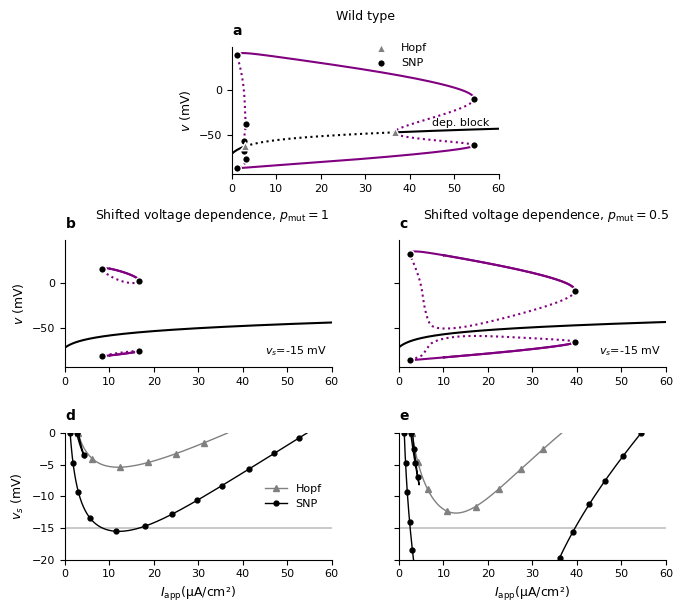

In [15]:
fig = plt.figure(layout="tight")

fig.set_size_inches(plot_helper.fig_size_default["width"], 6.2)  # figure size 

# figure layout
n_rows = 3
n_cols = 4
ax_bd_wrt_s_wt = plt.subplot2grid((n_rows, n_cols), (0, 1), colspan=2, rowspan=1)
ax_bd_wrt_s_shift_all = plt.subplot2grid((n_rows, n_cols), (1, 0), colspan=2, rowspan=1)
ax_bd_wrt_s_shift_half = plt.subplot2grid((n_rows, n_cols), (1, 2), colspan=2, rowspan=1)
ax_bd_codim_2_s_shift_all = plt.subplot2grid((n_rows, n_cols), (2, 0), colspan=2, rowspan=1)
ax_bd_codim_2_s_shift_half = plt.subplot2grid((n_rows, n_cols), (2, 2), colspan=2, rowspan=1)

# shared axes
plot_helper.share_axis([ax_bd_wrt_s_wt, ax_bd_wrt_s_shift_all, ax_bd_wrt_s_shift_half], y=True)
plot_helper.share_axis([ax_bd_codim_2_s_shift_all, ax_bd_codim_2_s_shift_half], y=True)
plot_helper.share_axis([ax_bd_wrt_s_wt, ax_bd_wrt_s_shift_all, ax_bd_wrt_s_shift_half, ax_bd_codim_2_s_shift_all, ax_bd_codim_2_s_shift_half], x=True)


#### 1) bifurcation diagrams with respect to the applied current
# wild type
ax = ax_bd_wrt_s_wt
plot_bd_wt(ax, param_set_ids[0], runs_to_plot)
plot_helper.my_legend(ax, loc=[0.5, 0.8])
ax.set_xlim([0, 60])
ax.set_title("Wild type", y=1.15)
ax.text(x=45, y=-40, s=r"dep. block", color="k", fontsize=8)


# shift for all the Na+ channels
ax = ax_bd_wrt_s_shift_all
plot_bd_isolas(ax, param_set_ids[2], runs_to_plot)
ax.set_title("Shifted voltage dependence, "+r"$p_{\rm mut}=1$", y=1.1, x=0.55)
plot_helper.annotate_blended(ax, r"$v_s$=-15 mV", xy=[0.75, 0.1], fontsize=8)

# shift for only half of the sodium channels
ax = ax_bd_wrt_s_shift_half
plot_bd_isolas(ax, param_set_ids[1], runs_to_plot)
plot_helper.annotate_blended(ax, r"$v_s$=-15 mV", xy=[0.75, 0.1], fontsize=8)
ax.set_title("Shifted voltage dependence, "+r"$p_{\rm mut}=0.5$", y=1.1, x=0.55)


#### 2) bifurcation diagram with respect to I_app and shift_s
# shift for all the Na+ channels
ax = ax_bd_codim_2_s_shift_all
plot_bd_codim_2_all_channels(ax)
ax.axhline(y=-15, zorder=-1, color="k", lw=0.3)
ax.set_ylim([-20, 0])
ax.legend()
# shift for only half of the sodium channels
ax = ax_bd_codim_2_s_shift_half
plot_bd_codim_2_half_channels(ax)
ax.axhline(y=-15, zorder=-1, color="k", lw=0.3)

# axes settings
for ax in [ax_bd_wrt_s_wt, ax_bd_wrt_s_shift_all]:
    ax.set_ylabel(r"$v$ (mV)")

for ax in [ax_bd_codim_2_s_shift_all, ax_bd_codim_2_s_shift_half]:
    ax.set_xlabel(r"$I_{\rm app}$"+u"(\u00B5A/cm\u00B2)")

for ax in [ax_bd_codim_2_s_shift_all]:
    ax.set_ylabel(r"$v_s$ (mV)")

for ax in fig.axes:
    ax.spines[['right', 'top']].set_visible(False)

# beautify
for my_ax in [ax_bd_codim_2_s_shift_half, ax_bd_wrt_s_shift_half]:
    plt.setp(my_ax.get_yticklabels(), visible=False)
plot_helper.lettering(fig, pos=[0, 1.1], labels=["a", "b", "c", "d", "e"])  # panel labels

# save figure
fig_dir = plot_helper.fig_dir
fig_path = f'{fig_dir}/figure_5.eps'
print(fig_path)
plt.savefig(fig_path, format='eps')    